In [26]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt

In [29]:
BT_START_DATE = dt.datetime(2000,1,1)
BT_END_DATE = dt.datetime(2018,3,31)

In [32]:
assets = ['VFV.TO', 'XBB.TO']
df = pd.DataFrame()
for asset in assets:
    df[asset] = web.DataReader(asset, 'yahoo', BT_START_DATE, BT_END_DATE)['Adj Close']
df.head()

,VFV.TO,XBB.TO
Date,,
2012-11-08,21.681889,25.187113
2012-11-09,21.602852,25.187113
2012-11-12,21.576504,25.219036
2012-11-13,21.585287,25.219036
2012-11-14,21.436003,25.211073


In [33]:
df.tail()

,VFV.TO,XBB.TO
Date,,
2018-03-23,57.023281,28.692129
2018-03-26,58.416019,28.551617
2018-03-27,57.558800,28.720232
2018-03-28,57.578056,28.748337
2018-03-29,58.233013,28.748337


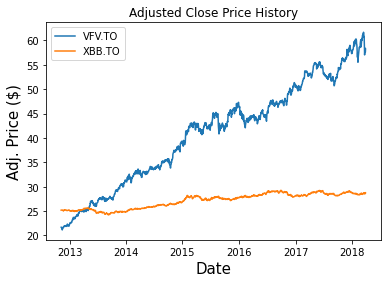

In [34]:
# Visually plot the price data for VFV and XBB

title = "Adjusted Close Price History"

for col in df.columns.values:
    plt.plot(df[col], label=col)
    
plt.title(title)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Adj. Price ($)', fontsize = 15)
plt.legend(df.columns.values, loc='upper left')

In [36]:
returns = df.pct_change()
returns

,VFV.TO,XBB.TO
Date,,
2012-11-08,NaN,NaN
2012-11-09,-0.003645,0.000000
2012-11-12,-0.001220,0.001267
2012-11-13,0.000407,0.000000
2012-11-14,-0.006916,-0.000316
...,...,...
2018-03-23,-0.024138,-0.001174
2018-03-26,0.024424,-0.004897
2018-03-27,-0.014674,0.005906


In [40]:
returns.mean() * 100

VFV.TO    0.076164
XBB.TO    0.010085
dtype: float64

In [41]:
# Calculate the simple annual portfolio return

backtesting_weights = np.array([0.35, 0.65])

port_simple_annual_return = np.sum(returns.mean() * backtesting_weights) * 252
port_simple_annual_return

0.08369593423133902

In [18]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,VFV.TO,XBB.TO
VFV.TO,0.026659,0.000747
XBB.TO,0.000747,0.003478


In [43]:
df.corr()

,VFV.TO,XBB.TO
VFV.TO,1.000000,0.925505
XBB.TO,0.925505,1.000000


In [19]:
current_market_value = 1654.92
vfv = 472.62
xbb = 1182.30

weights = np.array([vfv/current_market_value,xbb/current_market_value])
weights

array([0.2855848, 0.7144152])

In [20]:
# Calculate the portfolio variance and portfolio volatility

port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_volatility = np.sqrt(port_variance)

0.0042541635261319505

In [48]:
risk_free = 0.02

summary = {'Portfolio Simple Annual Return': port_simple_annual_return,
          'Portfolio Volatility': port_volatility,
          'Sharpe Ratio': (port_simple_annual_return - risk_free) / port_volatility}
summary_df = pd.DataFrame(summary.items(), columns=['Measurement', 'Value'])
summary_df

,Measurement,Value
0,Portfolio Simple Annual Return,0.083696
1,Portfolio Volatility,0.065224
2,Sharpe Ratio,0.976573


In [24]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [25]:
# Portfolio Optimization
# Calculate the expected returns and the annualized sample covariance matrix

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('VFV.TO', 0.58071), ('XBB.TO', 0.41929)])
Expected annual return: 12.2%
Annual volatility: 10.0%
Sharpe Ratio: 1.02


(0.12210007675730192, 0.09982600958386276, 1.0227803072858355)